# **HOMEWORK 4: Unsupervised Learning**

Matrix A: 
[[ 0.39950683  0.01670242 -0.66429346  0.57440467  1.00066116  1.09936479]
 [ 1.18140646 -0.56234245  0.97321889  0.41997667 -0.84158475 -2.15127851]
 [ 0.75607109 -0.78900557  0.24028584  0.48789342  0.27396163  0.70661461]
 [-0.42427875  0.49551989  1.18857059  0.2857305  -1.90434528  0.23114036]
 [ 0.38135372  0.17447907  0.73598985 -1.3314379   2.07361599  0.56067028]
 [-0.42915872  0.41129844  1.41957033  1.64961043  0.4663687   0.02374527]
 [-0.58678039  1.66566999 -1.21391031 -0.02173522  0.0889901  -0.98376951]
 [-0.47013204  1.43801239 -1.62055179 -1.36980608 -0.82034926  1.00095956]
 [-0.64007643 -0.23520353 -0.15822649 -0.05960435 -1.08443789  1.37284921]
 [ 0.99713371  1.27685694  1.1019252  -0.54495719  0.09064116 -0.65717827]]
The shape of A is: (10, 6).
U shape: (10, 10) | singular values number: (6,) | V^T shape (6, 6)
Sigma matrix: 
[[4.21571722 0.         0.         0.         0.         0.        ]
 [0.         3.60648121 0.         0.         0.         0

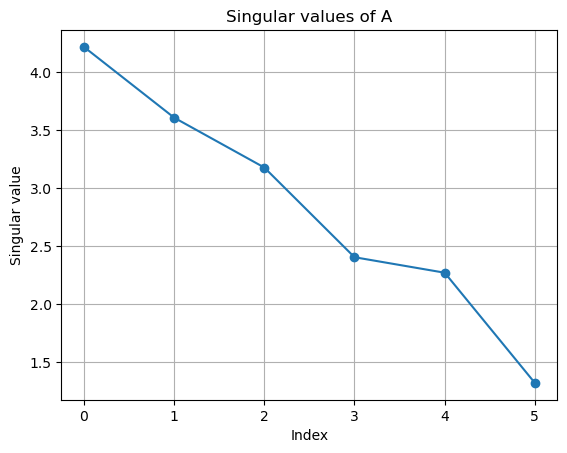

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# EXERCISE 1: Compute the SVD of a Matrix & Verify the Reconstruction

m, n = 10, 6
A = np.random.randn(m, n)
print(f"Matrix A: \n{A}")
print(f"The shape of A is: {(m, n)}.")

U, s, VT = np.linalg.svd(A, full_matrices=True)
print(f"U shape: {U.shape} | singular values number: {s.shape} | V^T shape {VT.shape}")

Sigma = np.zeros((m, n))
Sigma[:n, :n] = np.diag(s)
print(f"Sigma matrix: \n{Sigma}")
A_rec = U @ Sigma @ VT
frob_error = np.linalg.norm(A_rec - A, ord='fro')
print("Frobenius error:", frob_error)

print(f"Singular values: {s}")
plt.figure()
plt.plot(s, 'o-')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of A')
plt.grid()
plt.show()


[[-1.51427373e-01 -1.57829273e+00 -7.55162547e-02  7.22893681e-01
   2.43149124e-02 -1.02602106e+00]
 [-1.51186931e+00  1.95875201e+00  4.44745583e-03  2.55744741e+00
  -1.12041935e+00 -1.09228698e+00]
 [-1.47860297e+00  3.36488527e-01 -5.07831320e-01 -2.40089790e-01
  -1.62363434e-01 -5.59204177e-01]
 [-2.09893262e+00 -7.73959730e-01  1.05156257e-01 -1.57511304e-03
  -8.89091102e-02  1.55508156e+00]
 [ 1.22722135e+00 -1.50185771e+00 -6.31308732e-01 -1.11895726e+00
   1.12061632e+00  3.27855851e-01]
 [-4.78341484e-01 -1.19434537e+00  7.23704258e-01 -3.95043958e-01
   5.41588049e-01  1.29359622e+00]
 [ 1.01385648e+00  1.29081777e-01  9.26187466e-01 -1.80513581e+00
  -1.66557050e+00  9.25915159e-01]
 [-1.32520595e+00 -1.76349742e+00 -2.89046017e-01 -9.52614471e-01
   1.28464829e-01 -6.09746180e-01]
 [-3.99399519e-01 -1.66346888e+00  3.42596170e-01  4.00105632e-02
   1.47149054e+00  1.66260134e-01]
 [-7.12850872e-01  2.34425764e-01  7.83357988e-02  1.09421921e-01
   1.67625504e+00  1.0502

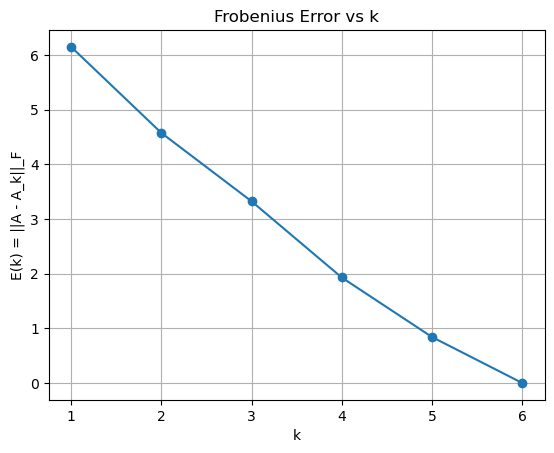

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# EXERCISE 2: Best Rank-k Approximation

m, n = 10, 6
A = np.random.randn(m, n)
print(A)
print(f"The shape of A is: {(m, n)}.")

U, s, VT = np.linalg.svd(A, full_matrices=True)
print(f"U shape: {U.shape} | singular values number: {s.shape} | V^T shape {VT.shape}")

def rank_k_approximation(k, s, U, VT):
    m, n = U.shape[0], VT.shape[1]
    A_k = np.zeros((m,n))
    for i in range(k):
        ui = U[:, i:i+1] 
        viT = VT[i:i+1, :]   
        A_k += s[i]* (ui@viT)
    return A_k

ks = np.arange(1, min(m, n)+1) 
errors = []
for k in ks:
    A_k = rank_k_approximation(k, s, U, VT)
    frob_error = np.linalg.norm(A_k - A, ord='fro')
    errors.append(frob_error)

errors = [float(e) for e in errors]
print("Frobenius errors:", errors)


plt.figure()
plt.plot(ks, errors, 'o-')
plt.xlabel('k')
plt.ylabel('E(k) = ||A - A_k||_F')
plt.title('Frobenius Error vs k')
plt.grid()
plt.show()

Shape of the image: (512, 512).


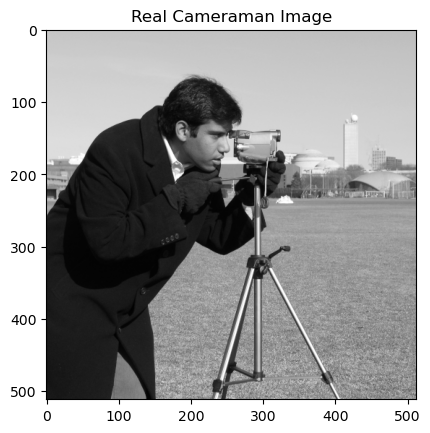

(512, 512) (512,) (512, 512)
(512, 512)
Real rank: 512
Compressed ranks: [2, 20, 50, 100, 200]


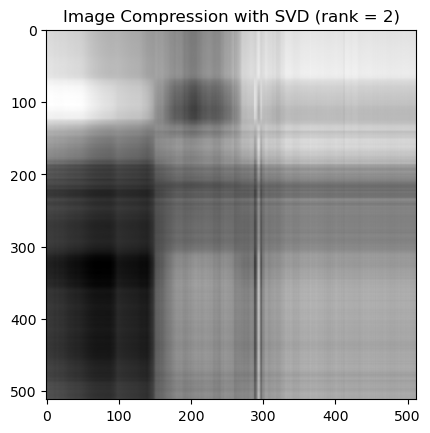

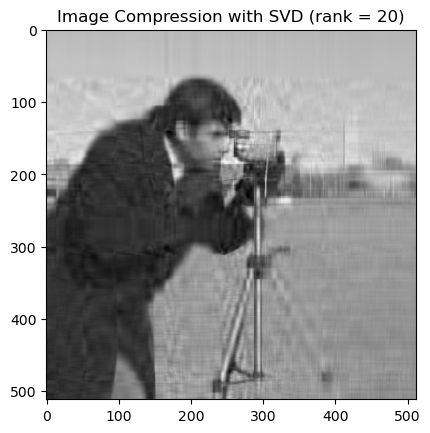

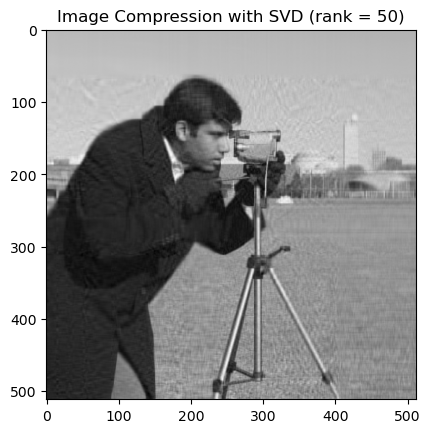

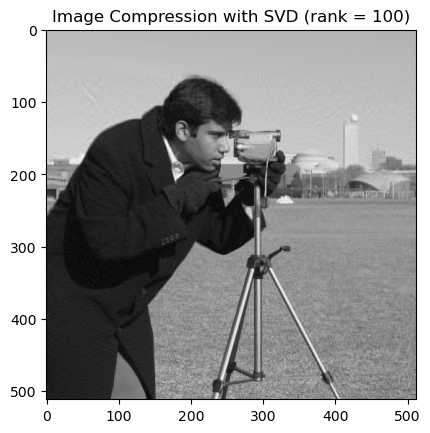

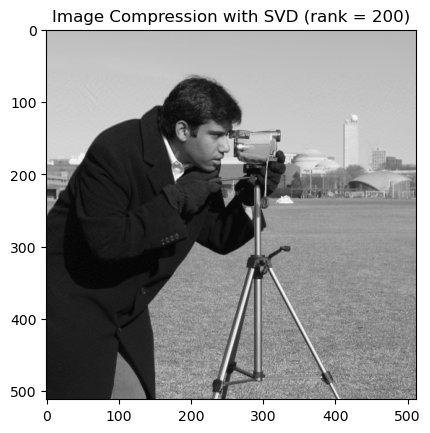

Frobenius Norms (errors): 
[21474.72480711254, 7699.909141968125, 4836.068907869384, 2992.1443824198554, 1342.358196813299]
Compression Factors: 
[0.9921798706054688, 0.9217987060546875, 0.8044967651367188, 0.6089935302734375, 0.217987060546875]


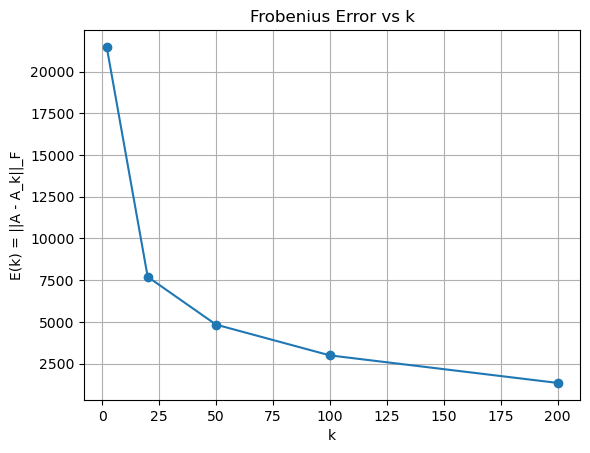

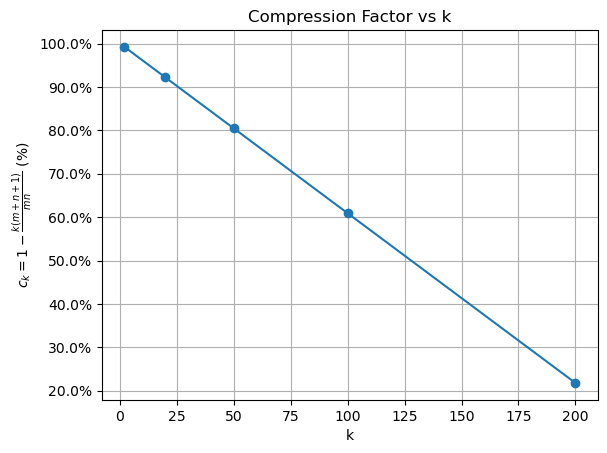

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

# EXERCISE 3: Image Compression with SVD

X = skimage.data.camera()
m, n = X.shape[0], X.shape[1]
print(f"Shape of the image: {X.shape}.")

plt.imshow(X, cmap="gray")
plt.title("Real Cameraman Image")
plt.show()

U, s, VT = np.linalg.svd(X)
print(U.shape, s.shape, VT.shape)
S = np.diag(s) 
print(S.shape)

real_rank = np.linalg.matrix_rank(X)
print(f"Real rank: {real_rank}")

ks = [2, 20, 50, 100, 200]
print(f"Compressed ranks: {ks}")

errors = []
compression_factors = []
compression_factors_percentage = []
for k in ks:
    X_k = U[:, :k] @ S[:k, :k] @ VT[:k, :]

    plt.imshow(X_k, cmap="gray")
    plt.title(f"Image Compression with SVD (rank = {k})")
    plt.show()

    frob_error = np.linalg.norm(X_k - X, ord='fro')
    compression_factor = 1 - k*(m+n+1)/(m*n)

    errors.append(frob_error)
    compression_factors.append(compression_factor)
    compression_factors_percentage.append(compression_factor*100)


errors = [float(e) for e in errors]
print(f"Frobenius Norms (errors): \n{errors}")
print(f"Compression Factors: \n{compression_factors}")

plt.figure()
plt.plot(ks, errors, 'o-')
plt.xlabel('k')
plt.ylabel('E(k) = ||A - A_k||_F')
plt.title('Frobenius Error vs k')
plt.grid()

plt.figure()
plt.plot(ks, compression_factors_percentage, 'o-')
plt.xlabel('k')
plt.ylabel(r'$c_k = 1 - \frac{k(m+n+1)}{mn}$ (%)')
plt.title('Compression Factor vs k')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
plt.grid()
plt.show()


Shape of the data: (42000, 785)
Shape X: (42000, 784) Shape y: (42000,)
Final shape of filtered X: (8423, 784). Final shape of filtered Y: (8423,)


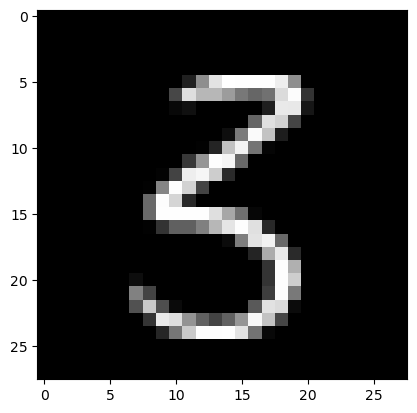

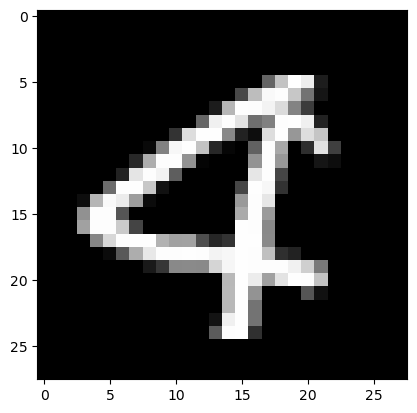

(6738, 784) (1685, 784)
Shape of c(X): (1, 784).
Shape of projected data: (6738, 2).
Shape Z_test: (1685, 2).


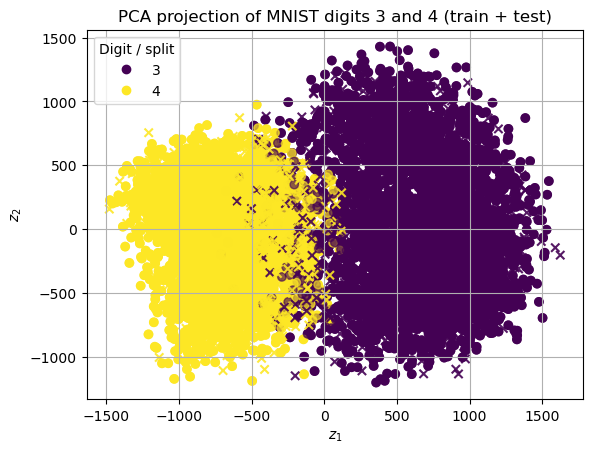

----------------------------2 or 8-----------------------------------
X_train shape: (6592, 784) | X_test shape: (1648, 784)
Shape of c(X): (1, 784).
Shape of projected data: (6592, 2).
Shape Z_test: (1648, 2).


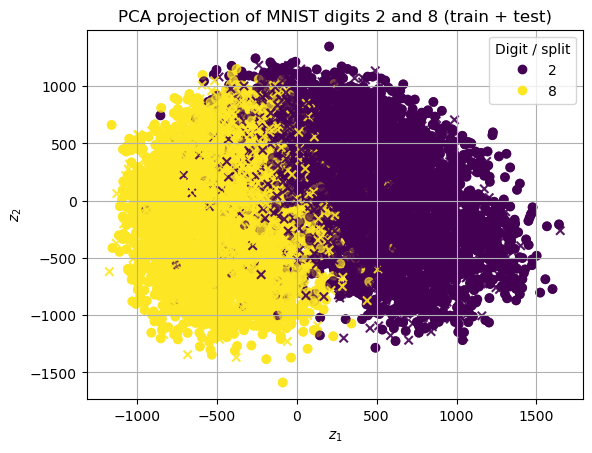

----------------------------k = 3-----------------------------------
Z_train shape: (6592, 3) Z_test shape: (1648, 3)


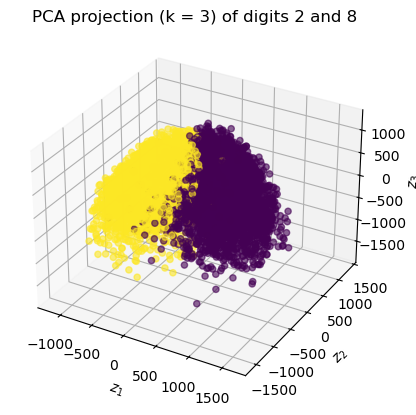

----------------------------1 or 7-----------------------------------
X_train shape: (7268, 784) | X_test shape: (1817, 784)
Shape of c(X): (1, 784).
Shape of projected data: (7268, 2).
Shape Z_test: (1817, 2).


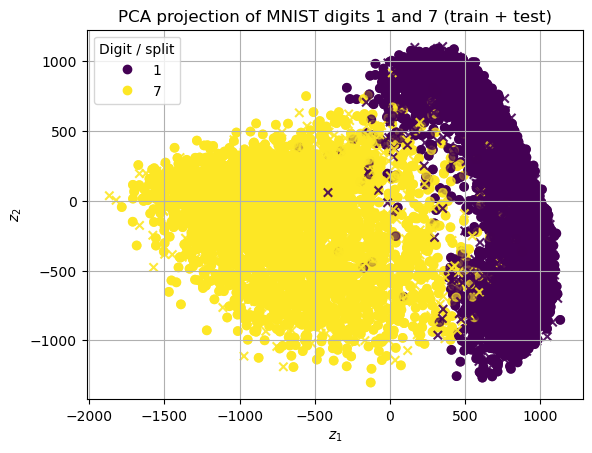

----------------------------k = 3-----------------------------------
Z_train shape: (7268, 3) Z_test shape: (1817, 3)


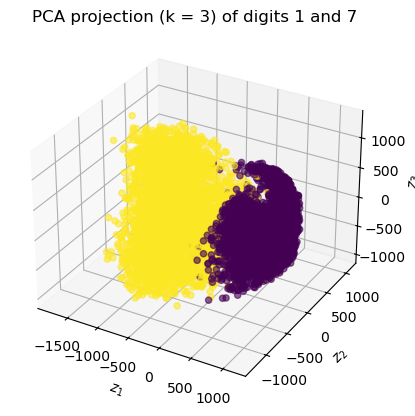

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# EXERCISE 4: PCA + Clustering on a Real Dataset

url = "train.csv"
data = pd.read_csv(url).values

print(f"Shape of the data: {data.shape}")

X = data[:, 1:]     
Y = data[:, 0]    

print("Shape X:", X.shape, "Shape y:", Y.shape)

def visualize(X, idx):
    img = X[idx]
    
    img = np.reshape(img, (28, 28))

    plt.imshow(img, cmap='gray')
    plt.show()

filter_3or4 = (Y==3) | (Y==4)

X_filtered = X[filter_3or4]
Y_filtered = Y[filter_3or4]

print(f"Final shape of filtered X: {X_filtered.shape}. Final shape of filtered Y: {Y_filtered.shape}")

N, d = X_filtered.shape
visualize(X_filtered, 11)
visualize(X_filtered, 10)

def split_data(X, Y, N_train):
    N, d = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train] 
    test_idx = idx[N_train:]
    
    X_train = X[train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

print(X_train.shape, X_test.shape)

cX = np.mean(X_train, axis=0)

cX = np.reshape(cX, (1, d))
print(f"Shape of c(X): {cX.shape}.")

Xc = X_train - cX

U, s, VT = np.linalg.svd(Xc, full_matrices=False)

k = 2
VTk = VT[:k]

P = VTk

Z_train = Xc @ P.T
print(f"Shape of projected data: {Z_train.shape}.")

Xc_test = X_test - cX
Z_test = Xc_test @ P.T
print(f"Shape Z_test: {Z_test.shape}.")

plt.figure()
ax = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train)
plt.scatter(Z_train[:, 0], Z_train[:, 1],
            c=Y_train, cmap='viridis', marker='o',
            alpha=0.6, label='train')

plt.scatter(Z_test[:, 0], Z_test[:, 1],
            c=Y_test, cmap='viridis', marker='x',
            alpha=0.9, label='test')
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 3 and 4 (train + test)")
plt.grid()
plt.legend(*ax.legend_elements(), title="Digit / split")
plt.show()


# ------------------------------------------------------------------
print("----------------------------2 or 8-----------------------------------")
filter_2or8 = (Y == 2) | (Y == 8)
X_filtered = X[filter_2or8]
Y_filtered = Y[filter_2or8]
N, d = X_filtered.shape          

N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")

cX = np.mean(X_train, axis=0)

cX = np.reshape(cX, (1, d))
print(f"Shape of c(X): {cX.shape}.")

Xc = X_train - cX
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

k = 2
VTk = VT[:k]

P = VTk

Z_train = Xc @ P.T
print(f"Shape of projected data: {Z_train.shape}.")

Xc_test = X_test - cX
Z_test = Xc_test @ P.T
print(f"Shape Z_test: {Z_test.shape}.")

ax2 = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train)
plt.scatter(Z_train[:, 0], Z_train[:, 1],
            c=Y_train, cmap='viridis', marker='o',
            alpha=0.6, label='train')

plt.scatter(Z_test[:, 0], Z_test[:, 1],
            c=Y_test, cmap='viridis', marker='x',
            alpha=0.9, label='test')
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 2 and 8 (train + test)")
plt.grid()
plt.legend(*ax2.legend_elements(), title="Digit / split")
plt.show()

# ------------------------------------------------------------------
print("----------------------------k = 3-----------------------------------")
from mpl_toolkits.mplot3d import Axes3D  

k = 3
VTk = VT[:k]
P = VTk
Z_train = Xc @ P.T     
Z_test  = Xc_test  @ P.T  

print("Z_train shape:", Z_train.shape, "Z_test shape:", Z_test.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z_train[:, 0], Z_train[:, 1], Z_train[:, 2],
           c=Y_train, cmap='viridis', marker='o', alpha=0.6)

ax.set_xlabel(r"$z_1$")
ax.set_ylabel(r"$z_2$")
ax.set_zlabel(r"$z_3$")
ax.set_title("PCA projection (k = 3) of digits 2 and 8")
plt.show()

# ------------------------------------------------------------------
print("----------------------------1 or 7-----------------------------------")

filter_1or7 = (Y == 1) | (Y == 7)
X_filtered2 = X[filter_1or7]
Y_filtered2 = Y[filter_1or7]
N2, d2 = X_filtered2.shape          

N_train2 = int(N2 * 0.8)
(X_train2, Y_train2), (X_test2, Y_test2) = split_data(X_filtered2, Y_filtered2, N_train2)

print(f"X_train shape: {X_train2.shape} | X_test shape: {X_test2.shape}")

cX2 = np.mean(X_train2, axis=0)

cX2 = np.reshape(cX2, (1, d2))
print(f"Shape of c(X): {cX2.shape}.")

Xc2 = X_train2 - cX2
U2, s2, VT2 = np.linalg.svd(Xc2, full_matrices=False)

k2 = 2
VTk2 = VT2[:k2]

P2 = VTk2

Z_train2 = Xc2 @ P2.T
print(f"Shape of projected data: {Z_train2.shape}.")

Xc_test2 = X_test2 - cX2
Z_test2 = Xc_test2 @ P2.T
print(f"Shape Z_test: {Z_test2.shape}.")

ax2 = plt.scatter(Z_train2[:, 0], Z_train2[:, 1], c=Y_train2)
plt.scatter(Z_train2[:, 0], Z_train2[:, 1],
            c=Y_train2, cmap='viridis', marker='o',
            alpha=0.6, label='train')

plt.scatter(Z_test2[:, 0], Z_test2[:, 1],
            c=Y_test2, cmap='viridis', marker='x',
            alpha=0.9, label='test')
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 1 and 7 (train + test)")
plt.grid()
plt.legend(*ax2.legend_elements(), title="Digit / split")
plt.show()

# ------------------------------------------------------------------
print("----------------------------k = 3-----------------------------------")

k2 = 3
VTk2 = VT2[:k2]
P2 = VTk2
Z_train2 = Xc2 @ P2.T    
Z_test2  = Xc_test2  @ P2.T    

print("Z_train shape:", Z_train2.shape, "Z_test shape:", Z_test2.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z_train2[:, 0], Z_train2[:, 1], Z_train2[:, 2],
           c=Y_train2, cmap='viridis', marker='o', alpha=0.6)

ax.set_xlabel(r"$z_1$")
ax.set_ylabel(r"$z_2$")
ax.set_zlabel(r"$z_3$")
ax.set_title("PCA projection (k = 3) of digits 1 and 7")
plt.show()

--------------------STEP 1: PCA Projection----------------------
Shape of the data: (42000, 785)
Shape X: (42000, 784) Shape y: (42000,)
Final shape of filtered X: (8423, 784). Final shape of filtered Y: (8423,)


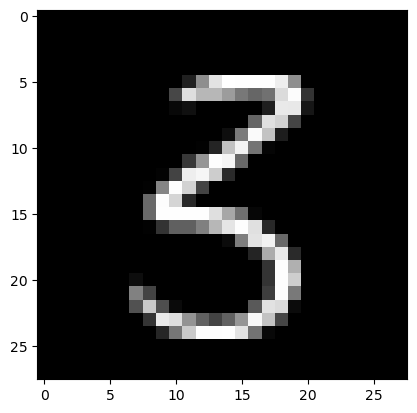

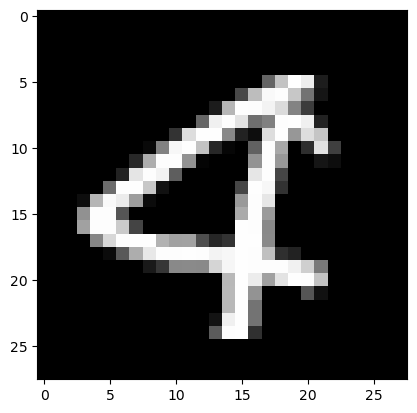

(6738, 784) (1685, 784)
Shape of c(X): (1, 784).
Shape of projected data: (6738, 2).
Shape Z_test: (1685, 2).


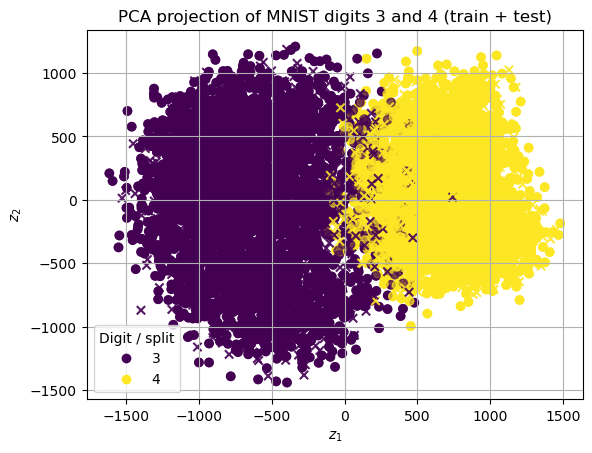

--------------------STEP 2: Fit a linear classifier----------------------
Z_train (with bias) shape: (6738, 3)
Z_test (with bias) shape: (1685, 3)
y_train shape: (6738,)
y_test shape: (1685,)


C:\Users\franc\AppData\Local\Temp\ipykernel_28552\2999593289.py:107: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))
C:\Users\franc\AppData\Local\Temp\ipykernel_28552\2999593289.py:107: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))


Theta_hat: [-1.28554153  0.06315289  0.00257001]


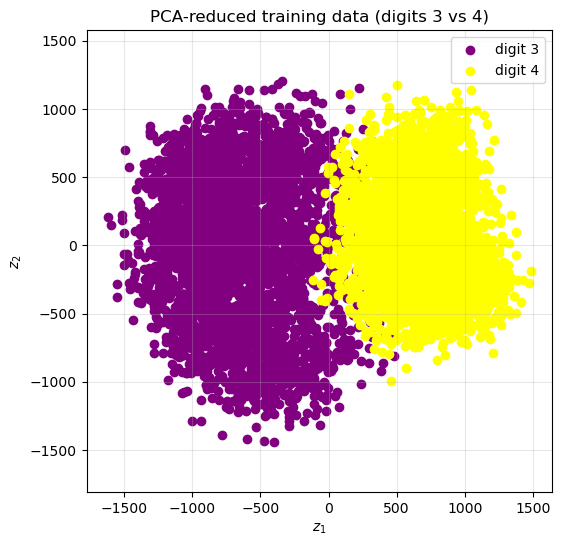

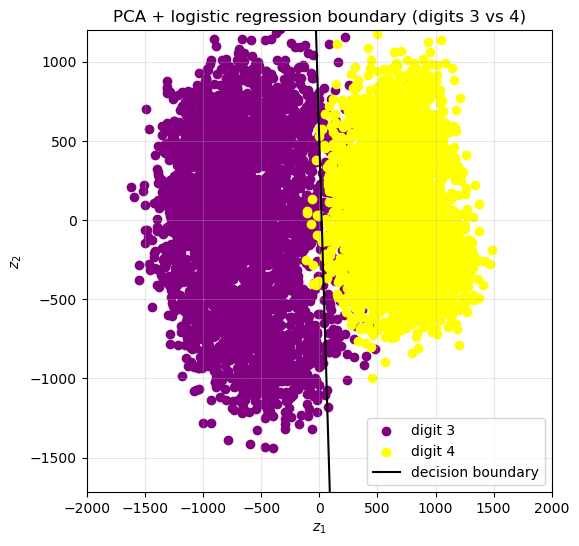

TP, FP, FN, TN: 820 34 8 823
Accuracy: 0.9750741839762611
Precision: 0.9601873536299765
Recall: 0.9903381642512077
F1: 0.9750297265160522
--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------
Centroid of digit 3: [-640.02314312  -27.96405742] Centroid of digit 4: [689.34675156  30.11911733]


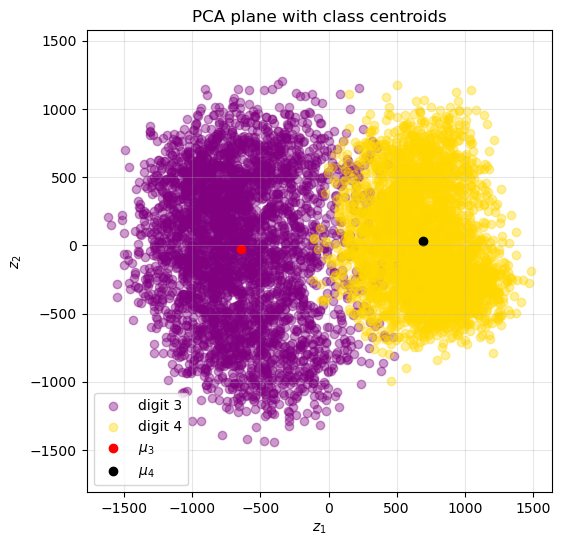

TP, FP, FN, TN: 820 33 8 824
Accuracy: 0.9756676557863502
Precision: 0.9613130128956624
Recall: 0.9903381642512077
F1: 0.9756097560975611


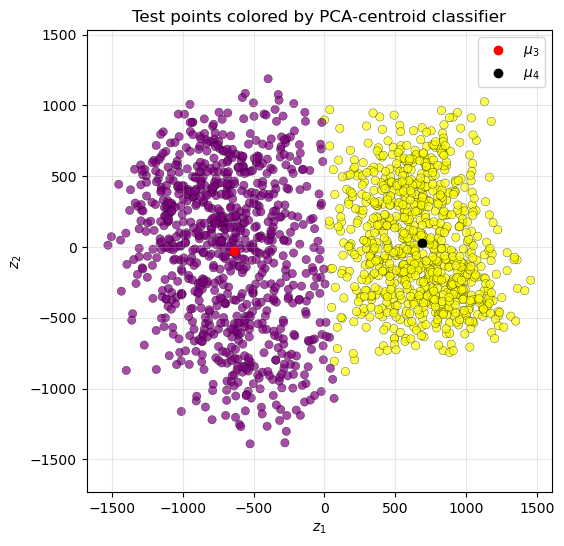

--------------------STEP 4: Compare accuracy and error patterns----------------------


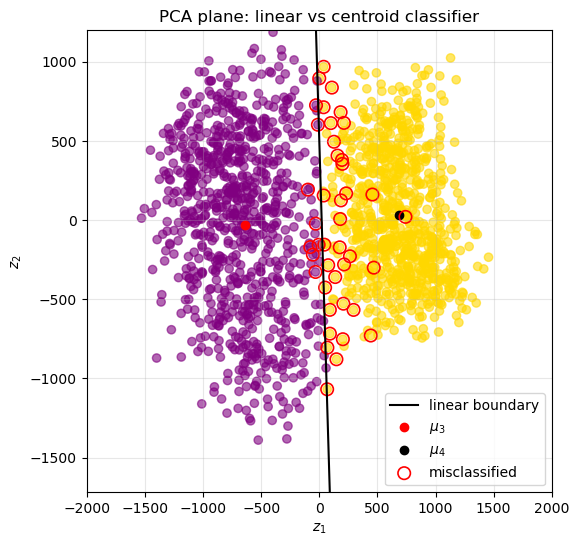

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# EXERCISE 5: Classification After PCA: Linear classifier and Centroid Classifier

print("--------------------STEP 1: PCA Projection----------------------")
np.random.seed(0)  
url = "train.csv"
data = pd.read_csv(url).values

print(f"Shape of the data: {data.shape}")

X = data[:, 1:]     
Y = data[:, 0]    

print("Shape X:", X.shape, "Shape y:", Y.shape)

def visualize(X, idx):
    img = X[idx]
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

filter_3or4 = (Y==3) | (Y==4)
X_filtered = X[filter_3or4]
Y_filtered = Y[filter_3or4]
print(f"Final shape of filtered X: {X_filtered.shape}. Final shape of filtered Y: {Y_filtered.shape}")

N, d = X_filtered.shape
visualize(X_filtered, 11)
visualize(X_filtered, 10)

def split_data(X, Y, N_train):
    N, d = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train] 
    test_idx = idx[N_train:]  
    
    X_train = X[train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)
print(X_train.shape, X_test.shape)

cX = np.mean(X_train, axis=0)

cX = np.reshape(cX, (1, d))
print(f"Shape of c(X): {cX.shape}.")

Xc = X_train - cX

U, s, VT = np.linalg.svd(Xc, full_matrices=False)

k = 2
VTk = VT[:k]

P = VTk

Z_train = Xc @ P.T
print(f"Shape of projected data: {Z_train.shape}.")

Xc_test = X_test - cX
Z_test = Xc_test @ P.T
print(f"Shape Z_test: {Z_test.shape}.")

plt.figure()
ax = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train)
plt.scatter(Z_train[:, 0], Z_train[:, 1],
            c=Y_train, cmap='viridis', marker='o',
            alpha=0.6, label='train')

plt.scatter(Z_test[:, 0], Z_test[:, 1],
            c=Y_test, cmap='viridis', marker='x',
            alpha=0.9, label='test')
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 3 and 4 (train + test)")
plt.grid()
plt.legend(*ax.legend_elements(), title="Digit / split")
plt.show()

#------------------------------------------------------------
print("--------------------STEP 2: Fit a linear classifier----------------------")


Z_train = np.hstack([np.ones((Z_train.shape[0], 1)), Z_train])
Z_test = np.hstack([np.ones((Z_test.shape[0], 1)), Z_test])
print(f"Z_train (with bias) shape: {Z_train.shape}")
print(f"Z_test (with bias) shape: {Z_test.shape}")

y_train = (Y_train == 4)
y_test  = (Y_test  == 4)

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

def sigmoid(z):
    return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))

def l(theta, X, y):
    eps = 1e-12
    p = sigmoid(X @ theta)
    p = np.clip(p, 1e-12, 1-eps) 
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def grad_l(theta, X, y):
    p = sigmoid(X @ theta)
    return (X.T @ (p - y)) / len(y)

def accuracy(theta, X, y):
    preds = sigmoid(X @ theta) >= 0.5
    return np.mean(preds == y)

def SGD(l, grad_l, Theta0, X, Y, batch_size=32, lr=1e-3, epochs=200):
    losses = [l(Theta0, X, Y)]
    accs = [accuracy(Theta0, X, Y)]
    Theta = Theta0.copy()
    thetas = [Theta.copy()]
    N = X.shape[0]
    
    for epoch in range(epochs):
        indices = np.random.permutation(N)  
        for start in range(0, N, batch_size):
            batch_idx = indices[start : start+batch_size]
            Xb = X[batch_idx]
            Yb = Y[batch_idx]

            g = grad_l(Theta, Xb, Yb)

            Theta = Theta - lr * g

        losses.append(l(Theta, X, Y))
        thetas.append(Theta.copy())
        accs.append(accuracy(Theta, X, Y))
    return np.array(thetas), np.array(losses), np.array(accs)

Theta0 = np.zeros((Z_train.shape[1]))
thetas, losses, accs = SGD(l, grad_l, Theta0, Z_train, y_train,
                           batch_size=32, lr=1e-3, epochs=200)
Theta_hat = thetas[-1]
print("Theta_hat:", Theta_hat)

theta0, theta1, theta2 = Theta_hat.ravel()

Z0 = Z_train[Y_train == 3][:, 1:3]   
Z1 = Z_train[Y_train == 4][:, 1:3]   


plt.figure(figsize=(6,6))
plt.scatter(Z0[:,0], Z0[:,1], c="purple",  label="digit 3")
plt.scatter(Z1[:,0], Z1[:,1], c="yellow", label="digit 4")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA-reduced training data (digits 3 vs 4)")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

z1_vals = np.linspace(
    min(Z0[:,0].min(), Z1[:,0].min()),
    max(Z0[:,0].max(), Z1[:,0].max()),
    200
)

z2_vals = -(theta0 + theta1 * z1_vals) / (theta2)

plt.figure(figsize=(6,6))
plt.scatter(Z0[:,0], Z0[:,1], c="purple",  label="digit 3")
plt.scatter(Z1[:,0], Z1[:,1], c="yellow", label="digit 4")
plt.plot(z1_vals, z2_vals, "k-", label="decision boundary")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA + logistic regression boundary (digits 3 vs 4)")
plt.xlim(-2000,2000)
plt.ylim(-1720,1200)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

def eval_metrics(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    accuracy  = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) \
                if (precision + recall) > 0 else 0.0
    return TP, FP, FN, TN, accuracy, precision, recall, f1

y_prob_test = sigmoid(Z_test @ Theta_hat)

TP, FP, FN, TN, acc, prec, rec, f1 = eval_metrics(y_test, y_prob_test)

print("TP, FP, FN, TN:", TP, FP, FN, TN)
print("Accuracy:",  acc)
print("Precision:", prec)
print("Recall:",    rec)
print("F1:",        f1)

#------------------------------------------------------------
print("--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------")
Z_train_raw = Xc @ P.T         
Z_test_raw  = (X_test - cX) @ P.T
Z3 = Z_train_raw[Y_train == 3]
Z4 = Z_train_raw[Y_train == 4]

centroid_3 = Z3.mean(axis=0)
centroid_4 = Z4.mean(axis=0)

print("Centroid of digit 3:", centroid_3, "Centroid of digit 4:", centroid_4)

plt.figure(figsize=(6,6))
plt.scatter(Z3[:,0], Z3[:,1], c="purple", alpha=0.4, label="digit 3")
plt.scatter(Z4[:,0], Z4[:,1], c="gold",   alpha=0.4, label="digit 4")
plt.scatter(centroid_3[0], centroid_3[1], c="red", marker="o", label=r"$\mu_3$")
plt.scatter(centroid_4[0], centroid_4[1], c="black", marker="o", label=r"$\mu_4$")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane with class centroids")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

def predict_pca_centroid(Z_2d, centroid_3, centroid_4):
    d3 = np.linalg.norm(Z_2d - centroid_3, axis=1)
    d4 = np.linalg.norm(Z_2d - centroid_4, axis=1)
    return (d4 < d3).astype(int) 

y_pred_nc = predict_pca_centroid(Z_test_raw, centroid_3, centroid_4)

y_test_bin = (Y_test == 4)
TP2, FP2, FN2, TN2, acc2, prec2, rec2, f12 = eval_metrics(y_test_bin, y_pred_nc)

print("TP, FP, FN, TN:", TP2, FP2, FN2, TN2)
print("Accuracy:",  acc2)
print("Precision:", prec2)
print("Recall:",    rec2)
print("F1:",        f12)

plt.figure(figsize=(6,6))
colors = np.where(y_pred_nc == 1, "yellow", "purple")

plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1],
            c=colors, alpha=0.7, edgecolor="k", linewidth=0.3)
plt.scatter(centroid_3[0], centroid_3[1], c="red",   marker="o", label=r"$\mu_3$")
plt.scatter(centroid_4[0], centroid_4[1], c="black", marker="o", label=r"$\mu_4$")

plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("Test points colored by PCA-centroid classifier")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

#------------------------------------------------------------
print("--------------------STEP 4: Compare accuracy and error patterns----------------------")
y_prob_test = sigmoid(Z_test @ Theta_hat)
y_pred_lr = (y_prob_test >= 0.5).astype(int)  
y_test_bin = (Y_test == 4).astype(int)       

colors = np.where(y_pred_lr == 1, "gold", "purple")

plt.figure(figsize=(6,6))
plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1], c=colors, alpha=0.6)

z1_vals = np.linspace(Z_test_raw[:,0].min(), Z_test_raw[:,0].max(), 200)
z2_vals = -(theta0 + theta1 * z1_vals) / theta2
plt.plot(z1_vals, z2_vals, "k-", label="linear boundary")

plt.scatter(centroid_3[0], centroid_3[1], c="red",   marker="o",label=r"$\mu_3$")
plt.scatter(centroid_4[0], centroid_4[1], c="black", marker="o",label=r"$\mu_4$")

mis = (y_pred_lr != y_test_bin)
plt.scatter(Z_test_raw[mis,0], Z_test_raw[mis,1],
            facecolors="none", edgecolors="red", s=80, linewidth=1.2,
            label="misclassified")

plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane: linear vs centroid classifier")
plt.xlim(-2000,2000)
plt.ylim(-1720,1200)
plt.grid(alpha=0.3)
plt.legend()
plt.show()



--------------------STEP 1: PCA Projection----------------------


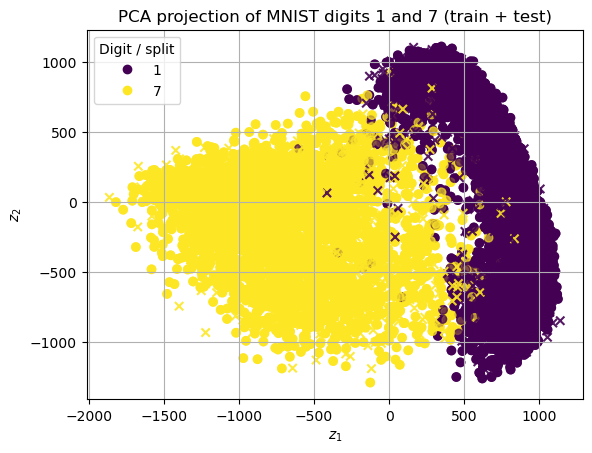

--------------------STEP 2: Fit a linear classifier----------------------


C:\Users\franc\AppData\Local\Temp\ipykernel_28552\2999593289.py:107: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))
C:\Users\franc\AppData\Local\Temp\ipykernel_28552\2999593289.py:107: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))


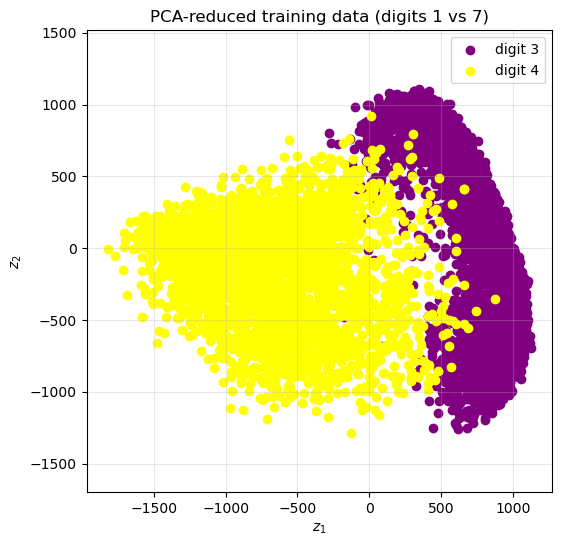

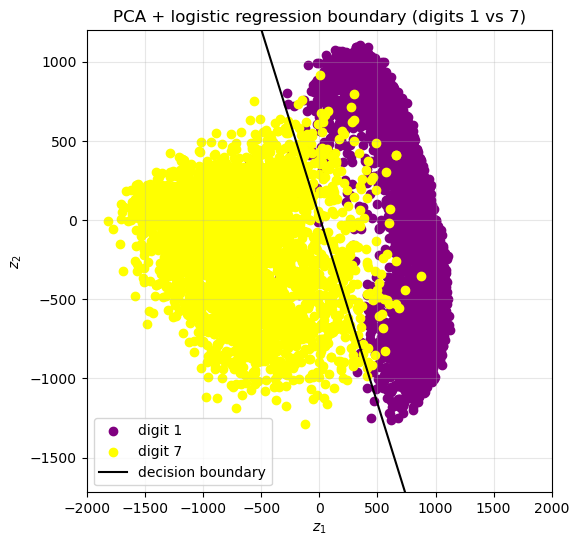

TP, FP, FN, TN: 844 4 48 921
Accuracy: 0.9713813979086406
Precision: 0.9952830188679245
Recall: 0.9461883408071748
F1: 0.9701149425287355
--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------


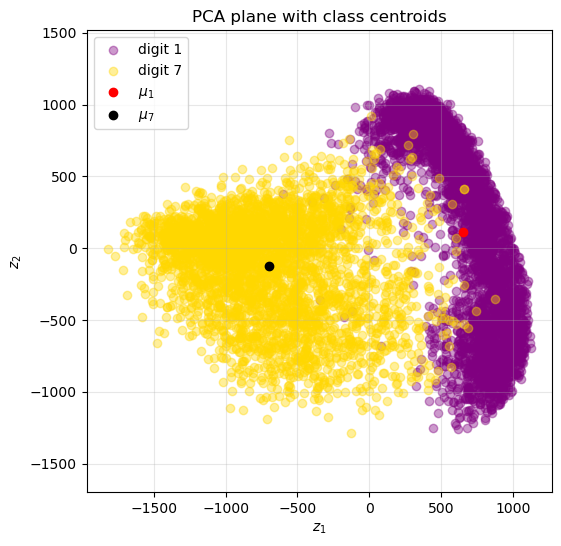

TP, FP, FN, TN: 826 4 66 921
Accuracy: 0.96147495872317
Precision: 0.9951807228915662
Recall: 0.9260089686098655
F1: 0.9593495934959348


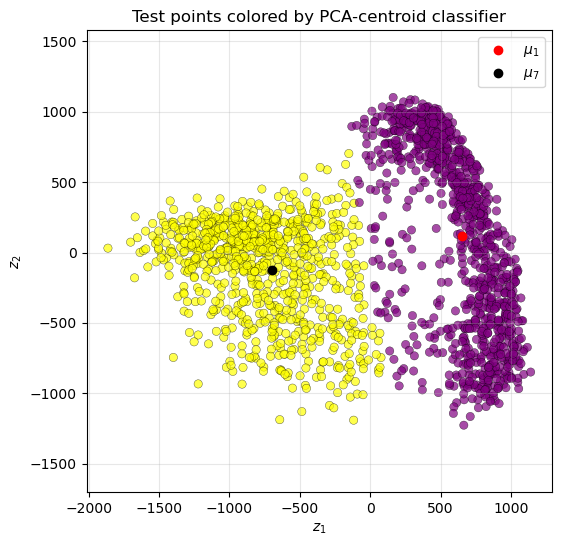

--------------------STEP 4: Compare accuracy and error patterns----------------------


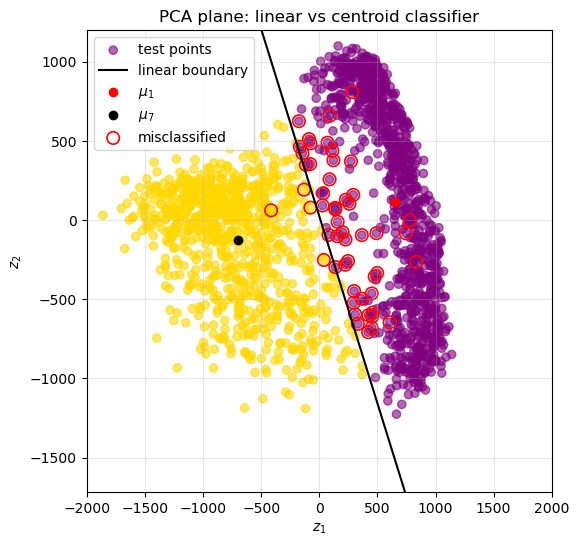

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("--------------------STEP 1: PCA Projection----------------------")
np.random.seed(0)  
url = "train.csv"
data = pd.read_csv(url).values

X = data[:, 1:]      
Y = data[:, 0]     


def visualize(X, idx):
    img = X[idx]
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

filter_3or4 = (Y==1) | (Y==7)
X_filtered = X[filter_3or4]
Y_filtered = Y[filter_3or4]

N, d = X_filtered.shape

N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

cX = np.mean(X_train, axis=0)

cX = np.reshape(cX, (1, d))
Xc = X_train - cX
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

k = 2
VTk = VT[:k]

P = VTk

Z_train = Xc @ P.T

Xc_test = X_test - cX
Z_test = Xc_test @ P.T

plt.figure()
ax = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train)
plt.scatter(Z_train[:, 0], Z_train[:, 1],
            c=Y_train, cmap='viridis', marker='o',
            alpha=0.6, label='train')

plt.scatter(Z_test[:, 0], Z_test[:, 1],
            c=Y_test, cmap='viridis', marker='x',
            alpha=0.9, label='test')
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 1 and 7 (train + test)")
plt.grid()
plt.legend(*ax.legend_elements(), title="Digit / split")
plt.show()

#------------------------------------------------------------
print("--------------------STEP 2: Fit a linear classifier----------------------")



Z_train = np.hstack([np.ones((Z_train.shape[0], 1)), Z_train])
Z_test = np.hstack([np.ones((Z_test.shape[0], 1)), Z_test])

y_train = (Y_train == 7)
y_test  = (Y_test  == 7)


Theta0 = np.zeros((Z_train.shape[1]))
thetas, losses, accs = SGD(l, grad_l, Theta0, Z_train, y_train,
                           batch_size=32, lr=1e-3, epochs=200)
Theta_hat = thetas[-1]

theta0, theta1, theta2 = Theta_hat.ravel()

Z0 = Z_train[Y_train == 1][:, 1:3]   
Z1 = Z_train[Y_train == 7][:, 1:3]   


plt.figure(figsize=(6,6))
plt.scatter(Z0[:,0], Z0[:,1], c="purple",  label="digit 3")
plt.scatter(Z1[:,0], Z1[:,1], c="yellow", label="digit 4")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA-reduced training data (digits 1 vs 7)")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

z1_vals = np.linspace(
    min(Z0[:,0].min(), Z1[:,0].min()),
    max(Z0[:,0].max(), Z1[:,0].max()),
    200
)

z2_vals = -(theta0 + theta1 * z1_vals) / (theta2)

plt.figure(figsize=(6,6))
plt.scatter(Z0[:,0], Z0[:,1], c="purple",  label="digit 1")
plt.scatter(Z1[:,0], Z1[:,1], c="yellow", label="digit 7")
plt.plot(z1_vals, z2_vals, "k-", label="decision boundary")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA + logistic regression boundary (digits 1 vs 7)")
plt.xlim(-2000,2000)
plt.ylim(-1720,1200)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

y_prob_test = sigmoid(Z_test @ Theta_hat)

TP, FP, FN, TN, acc, prec, rec, f1 = eval_metrics(y_test, y_prob_test)

print("TP, FP, FN, TN:", TP, FP, FN, TN)
print("Accuracy:",  acc)
print("Precision:", prec)
print("Recall:",    rec)
print("F1:",        f1)

#------------------------------------------------------------
print("--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------")
Z_train_raw = Xc @ P.T         
Z_test_raw  = (X_test - cX) @ P.T
Z1 = Z_train_raw[Y_train == 1]
Z7 = Z_train_raw[Y_train == 7]

centroid_1 = Z1.mean(axis=0)
centroid_7 = Z7.mean(axis=0)

plt.figure(figsize=(6,6))
plt.scatter(Z1[:,0], Z1[:,1], c="purple", alpha=0.4, label="digit 1")
plt.scatter(Z7[:,0], Z7[:,1], c="gold",   alpha=0.4, label="digit 7")
plt.scatter(centroid_1[0], centroid_1[1], c="red", marker="o", label=r"$\mu_1$")
plt.scatter(centroid_7[0], centroid_7[1], c="black", marker="o", label=r"$\mu_7$")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane with class centroids")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

y_pred_nc = predict_pca_centroid(Z_test_raw, centroid_1, centroid_7)

y_test_bin = (Y_test ==7)
TP2, FP2, FN2, TN2, acc2, prec2, rec2, f12 = eval_metrics(y_test_bin, y_pred_nc)

print("TP, FP, FN, TN:", TP2, FP2, FN2, TN2)
print("Accuracy:",  acc2)
print("Precision:", prec2)
print("Recall:",    rec2)
print("F1:",        f12)

plt.figure(figsize=(6,6))
colors = np.where(y_pred_nc == 1, "yellow", "purple")

plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1],
            c=colors, alpha=0.7, edgecolor="k", linewidth=0.3)
plt.scatter(centroid_1[0], centroid_1[1], c="red",   marker="o", label=r"$\mu_1$")
plt.scatter(centroid_7[0], centroid_7[1], c="black", marker="o", label=r"$\mu_7$")

plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("Test points colored by PCA-centroid classifier")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

#------------------------------------------------------------
print("--------------------STEP 4: Compare accuracy and error patterns----------------------")
y_prob_test = sigmoid(Z_test @ Theta_hat)
y_pred_lr = (y_prob_test >= 0.5).astype(int)  
y_test_bin = (Y_test == 7).astype(int)       

colors = np.where(y_pred_lr == 1, "gold", "purple")

plt.figure(figsize=(6,6))
plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1], c=colors, alpha=0.6, label="test points")

z1_vals = np.linspace(Z_test_raw[:,0].min(), Z_test_raw[:,0].max(), 200)
z2_vals = -(theta0 + theta1 * z1_vals) / theta2
plt.plot(z1_vals, z2_vals, "k-", label="linear boundary")

plt.scatter(centroid_1[0], centroid_1[1], c="red",   marker="o",label=r"$\mu_1$")
plt.scatter(centroid_7[0], centroid_7[1], c="black", marker="o",label=r"$\mu_7$")

mis = (y_pred_lr != y_test_bin)
plt.scatter(Z_test_raw[mis,0], Z_test_raw[mis,1],
            facecolors="none", edgecolors="red", s=80, linewidth=1.2,
            label="misclassified")

plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane: linear vs centroid classifier")
plt.xlim(-2000,2000)
plt.ylim(-1720,1200)
plt.grid(alpha=0.3)
plt.legend()
plt.show()



--------------------STEP 1: PCA Projection----------------------


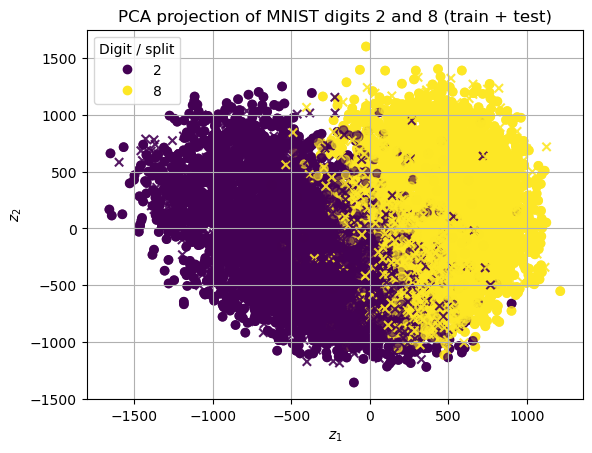

--------------------STEP 2: Fit a linear classifier----------------------


C:\Users\franc\AppData\Local\Temp\ipykernel_28552\2999593289.py:107: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))


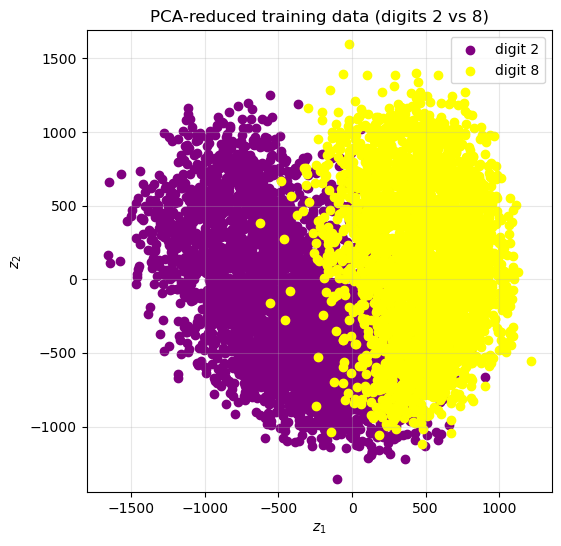

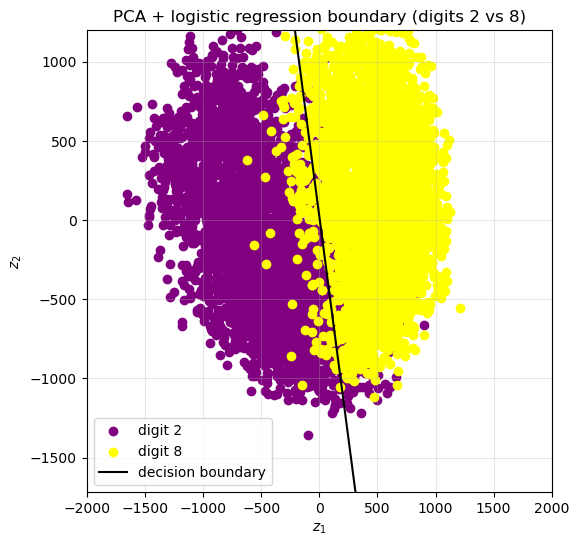

TP, FP, FN, TN: 805 69 37 737
Accuracy: 0.9356796116504854
Precision: 0.9210526315789473
Recall: 0.9560570071258907
F1: 0.9382284382284382
--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------


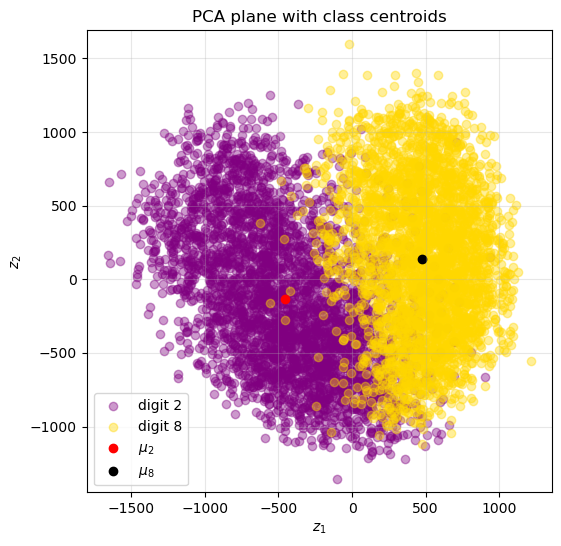

TP, FP, FN, TN: 802 52 40 754
Accuracy: 0.9441747572815534
Precision: 0.9391100702576113
Recall: 0.9524940617577197
F1: 0.945754716981132


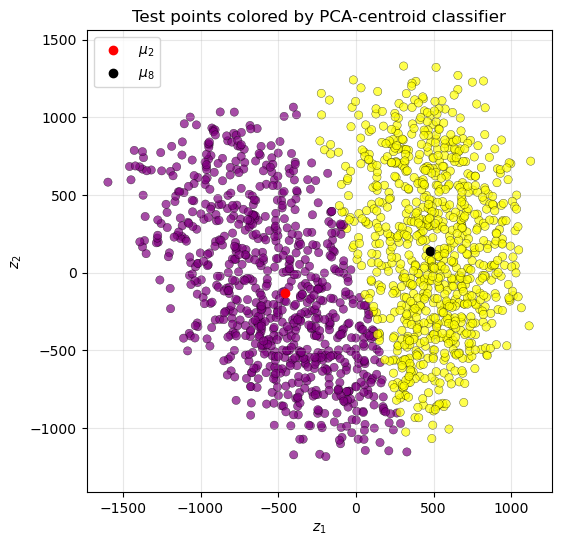

--------------------STEP 4: Compare accuracy and error patterns----------------------


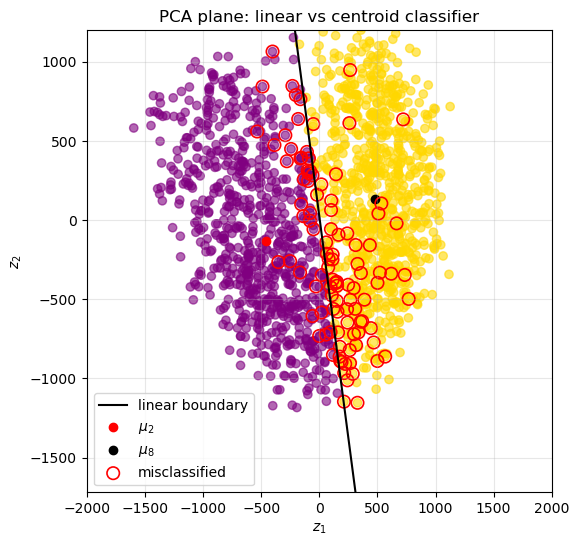

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("--------------------STEP 1: PCA Projection----------------------")
np.random.seed(0)  
url = "train.csv"
data = pd.read_csv(url).values

X = data[:, 1:]     
Y = data[:, 0]  


def visualize(X, idx):
    img = X[idx]
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

filter_3or4 = (Y==2) | (Y==8)
X_filtered = X[filter_3or4]
Y_filtered = Y[filter_3or4]

N, d = X_filtered.shape

N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

cX = np.mean(X_train, axis=0)

cX = np.reshape(cX, (1, d))
Xc = X_train - cX
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

k = 2
VTk = VT[:k]

P = VTk

Z_train = Xc @ P.T

Xc_test = X_test - cX
Z_test = Xc_test @ P.T

plt.figure()
ax = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train)
plt.scatter(Z_train[:, 0], Z_train[:, 1],
            c=Y_train, cmap='viridis', marker='o',
            alpha=0.6, label='train')

plt.scatter(Z_test[:, 0], Z_test[:, 1],
            c=Y_test, cmap='viridis', marker='x',
            alpha=0.9, label='test')
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 2 and 8 (train + test)")
plt.grid()
plt.legend(*ax.legend_elements(), title="Digit / split")
plt.show()

#------------------------------------------------------------
print("--------------------STEP 2: Fit a linear classifier----------------------")

Z_train = np.hstack([np.ones((Z_train.shape[0], 1)), Z_train])
Z_test = np.hstack([np.ones((Z_test.shape[0], 1)), Z_test])

y_train = (Y_train == 8)
y_test  = (Y_test  == 8)


Theta0 = np.zeros((Z_train.shape[1]))
thetas, losses, accs = SGD(l, grad_l, Theta0, Z_train, y_train,
                           batch_size=32, lr=1e-3, epochs=200)
Theta_hat = thetas[-1]

theta0, theta1, theta2 = Theta_hat.ravel()

Z0 = Z_train[Y_train == 2][:, 1:3]   
Z1 = Z_train[Y_train == 8][:, 1:3]  


plt.figure(figsize=(6,6))
plt.scatter(Z0[:,0], Z0[:,1], c="purple",  label="digit 2")
plt.scatter(Z1[:,0], Z1[:,1], c="yellow", label="digit 8")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA-reduced training data (digits 2 vs 8)")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

z1_vals = np.linspace(
    min(Z0[:,0].min(), Z1[:,0].min()),
    max(Z0[:,0].max(), Z1[:,0].max()),
    200
)

z2_vals = -(theta0 + theta1 * z1_vals) / (theta2)

plt.figure(figsize=(6,6))
plt.scatter(Z0[:,0], Z0[:,1], c="purple",  label="digit 2")
plt.scatter(Z1[:,0], Z1[:,1], c="yellow", label="digit 8")
plt.plot(z1_vals, z2_vals, "k-", label="decision boundary")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA + logistic regression boundary (digits 2 vs 8)")
plt.xlim(-2000,2000)
plt.ylim(-1720,1200)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

y_prob_test = sigmoid(Z_test @ Theta_hat)

TP, FP, FN, TN, acc, prec, rec, f1 = eval_metrics(y_test, y_prob_test)

print("TP, FP, FN, TN:", TP, FP, FN, TN)
print("Accuracy:",  acc)
print("Precision:", prec)
print("Recall:",    rec)
print("F1:",        f1)

#------------------------------------------------------------
print("--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------")
Z_train_raw = Xc @ P.T         
Z_test_raw  = (X_test - cX) @ P.T
Z2 = Z_train_raw[Y_train == 2]
Z8 = Z_train_raw[Y_train == 8]

centroid_2 = Z2.mean(axis=0)
centroid_8 = Z8.mean(axis=0)

plt.figure(figsize=(6,6))
plt.scatter(Z2[:,0], Z2[:,1], c="purple", alpha=0.4, label="digit 2")
plt.scatter(Z8[:,0], Z8[:,1], c="gold",   alpha=0.4, label="digit 8")
plt.scatter(centroid_2[0], centroid_2[1], c="red", marker="o", label=r"$\mu_2$")
plt.scatter(centroid_8[0], centroid_8[1], c="black", marker="o", label=r"$\mu_8$")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane with class centroids")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

y_pred_nc = predict_pca_centroid(Z_test_raw, centroid_2, centroid_8)

y_test_bin = (Y_test == 8)
TP2, FP2, FN2, TN2, acc2, prec2, rec2, f12 = eval_metrics(y_test_bin, y_pred_nc)

print("TP, FP, FN, TN:", TP2, FP2, FN2, TN2)
print("Accuracy:",  acc2)
print("Precision:", prec2)
print("Recall:",    rec2)
print("F1:",        f12)

plt.figure(figsize=(6,6))
colors = np.where(y_pred_nc == 1, "yellow", "purple")

plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1],
            c=colors, alpha=0.7, edgecolor="k", linewidth=0.3)
plt.scatter(centroid_2[0], centroid_2[1], c="red",   marker="o", label=r"$\mu_2$")
plt.scatter(centroid_8[0], centroid_8[1], c="black", marker="o", label=r"$\mu_8$")

plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("Test points colored by PCA-centroid classifier")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

#------------------------------------------------------------
print("--------------------STEP 4: Compare accuracy and error patterns----------------------")
y_prob_test = sigmoid(Z_test @ Theta_hat)
y_pred_lr = (y_prob_test >= 0.5).astype(int)  
y_test_bin = (Y_test == 8).astype(int)      

colors = np.where(y_pred_lr == 1, "gold", "purple")

plt.figure(figsize=(6,6))
plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1], c=colors, alpha=0.6)

z1_vals = np.linspace(Z_test_raw[:,0].min(), Z_test_raw[:,0].max(), 200)
z2_vals = -(theta0 + theta1 * z1_vals) / theta2
plt.plot(z1_vals, z2_vals, "k-", label="linear boundary")

plt.scatter(centroid_2[0], centroid_2[1], c="red",   marker="o",label=r"$\mu_2$")
plt.scatter(centroid_8[0], centroid_8[1], c="black", marker="o",label=r"$\mu_8$")

mis = (y_pred_lr != y_test_bin)
plt.scatter(Z_test_raw[mis,0], Z_test_raw[mis,1],
            facecolors="none", edgecolors="red", s=80, linewidth=1.2,
            label="misclassified")

plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane: linear vs centroid classifier")
plt.xlim(-2000,2000)
plt.ylim(-1720,1200)
plt.grid(alpha=0.3)
plt.legend()
plt.show()



--------------------STEP 1: PCA Projection----------------------


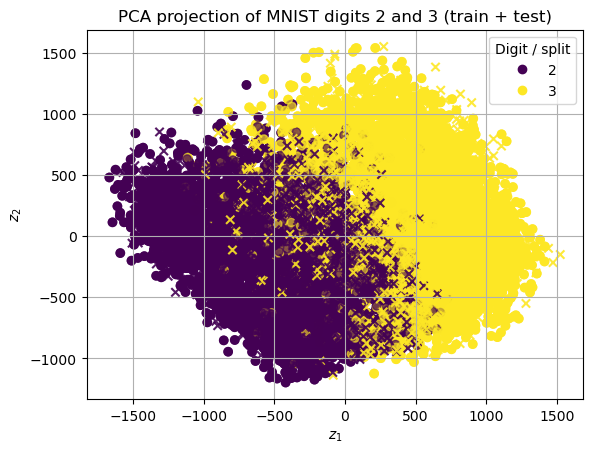

--------------------STEP 2: Fit a linear classifier----------------------


C:\Users\franc\AppData\Local\Temp\ipykernel_28552\2999593289.py:107: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))
C:\Users\franc\AppData\Local\Temp\ipykernel_28552\2999593289.py:107: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))


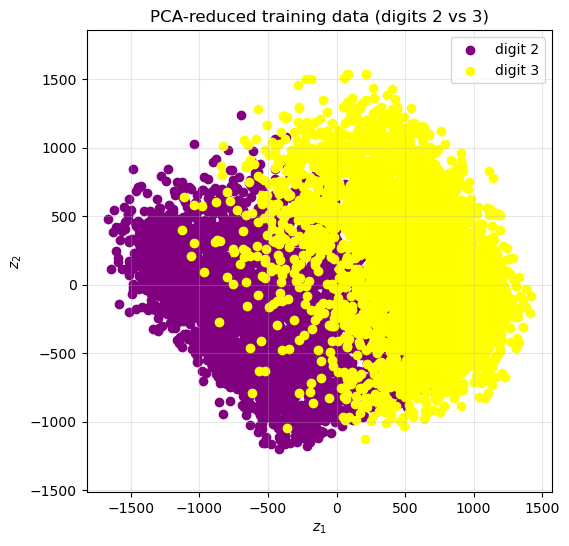

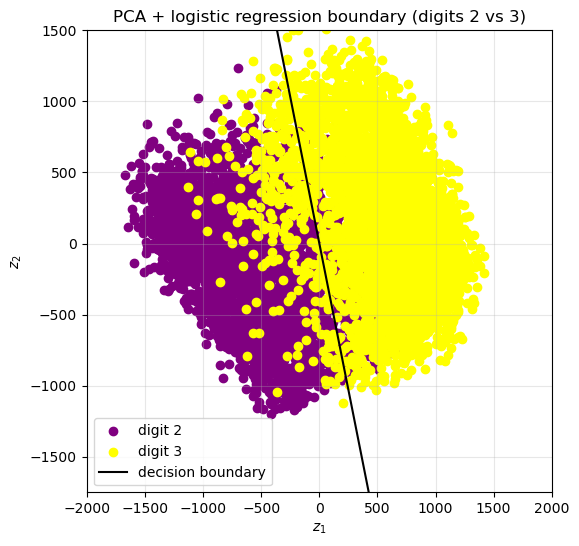

TP, FP, FN, TN: 790 100 83 733
Accuracy: 0.8927315357561547
Precision: 0.8876404494382022
Recall: 0.9049255441008018
F1: 0.8961996596710152
--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------


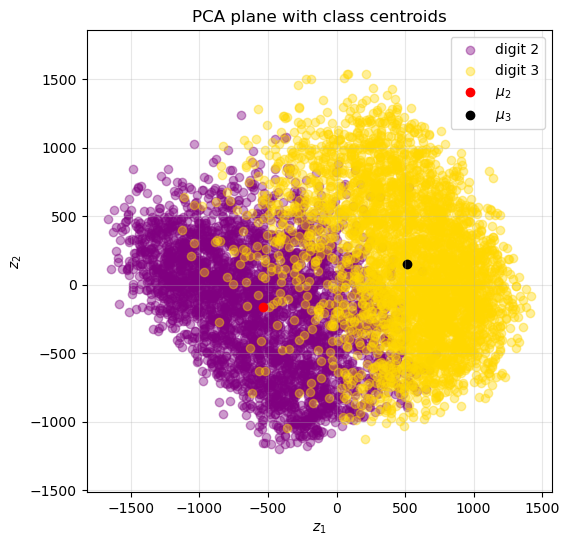

TP, FP, FN, TN: 791 101 82 732
Accuracy: 0.8927315357561547
Precision: 0.8867713004484304
Recall: 0.9060710194730813
F1: 0.8963172804532578


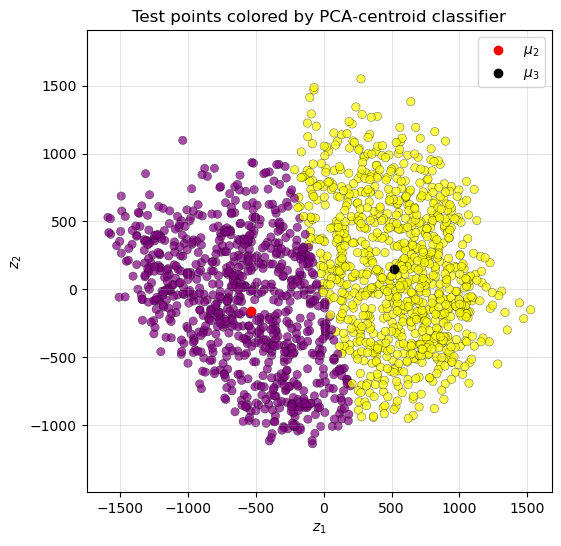

--------------------STEP 4: Compare accuracy and error patterns----------------------


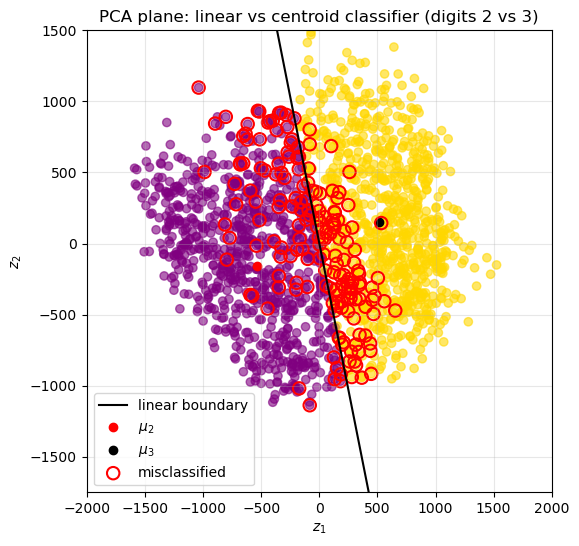

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("--------------------STEP 1: PCA Projection----------------------")
np.random.seed(0)
url = "train.csv"
data = pd.read_csv(url).values

X = data[:, 1:]      
Y = data[:, 0]        

def visualize(X, idx):
    img = X[idx]
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

filter_2or3 = (Y == 2) | (Y == 3)
X_filtered = X[filter_2or3]
Y_filtered = Y[filter_2or3]

N, d = X_filtered.shape

def split_data(X, Y, N_train):
    N, d = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:N_train]
    test_idx  = idx[N_train:]
    X_train = X[train_idx]
    Y_train = Y[train_idx]
    X_test  = X[test_idx]
    Y_test  = Y[test_idx]
    return (X_train, Y_train), (X_test, Y_test)

N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

cX = np.mean(X_train, axis=0)
cX = np.reshape(cX, (1, d))
Xc = X_train - cX
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

k = 2
VTk = VT[:k]
P = VTk

Z_train = Xc @ P.T
Xc_test = X_test - cX
Z_test = Xc_test @ P.T

plt.figure()
ax = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train)
plt.scatter(Z_train[:, 0], Z_train[:, 1],
            c=Y_train, cmap='viridis', marker='o',
            alpha=0.6, label='train')
plt.scatter(Z_test[:, 0], Z_test[:, 1],
            c=Y_test, cmap='viridis', marker='x',
            alpha=0.9, label='test')
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 2 and 3 (train + test)")
plt.grid()
plt.legend(*ax.legend_elements(), title="Digit / split")
plt.show()

#------------------------------------------------------------
print("--------------------STEP 2: Fit a linear classifier----------------------")

Z_train_lr = np.hstack([np.ones((Z_train.shape[0], 1)), Z_train])
Z_test_lr  = np.hstack([np.ones((Z_test.shape[0], 1)),  Z_test])

y_train = (Y_train == 3)  
y_test  = (Y_test  == 3)

Theta0 = np.zeros((Z_train_lr.shape[1]))
thetas, losses, accs = SGD(l, grad_l, Theta0, Z_train_lr, y_train,
                           batch_size=32, lr=1e-3, epochs=200)
Theta_hat = thetas[-1]
theta0, theta1, theta2 = Theta_hat.ravel()

Z2 = Z_train_lr[Y_train == 2][:, 1:3]    
Z3 = Z_train_lr[Y_train == 3][:, 1:3]  

plt.figure(figsize=(6,6))
plt.scatter(Z2[:,0], Z2[:,1], c="purple",  label="digit 2")
plt.scatter(Z3[:,0], Z3[:,1], c="yellow",  label="digit 3")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA-reduced training data (digits 2 vs 3)")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

z1_vals = np.linspace(
    min(Z2[:,0].min(), Z3[:,0].min()),
    max(Z2[:,0].max(), Z3[:,0].max()),
    200
)

z2_vals = -(theta0 + theta1 * z1_vals) / theta2

plt.figure(figsize=(6,6))
plt.scatter(Z2[:,0], Z2[:,1], c="purple",  label="digit 2")
plt.scatter(Z3[:,0], Z3[:,1], c="yellow",  label="digit 3")
plt.plot(z1_vals, z2_vals, "k-", label="decision boundary")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA + logistic regression boundary (digits 2 vs 3)")
plt.xlim(-2000, 2000)
plt.ylim(-1750, 1500)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

y_prob_test = sigmoid(Z_test_lr @ Theta_hat)
TP, FP, FN, TN, acc, prec, rec, f1 = eval_metrics(y_test, y_prob_test)
print("TP, FP, FN, TN:", TP, FP, FN, TN)
print("Accuracy:",  acc)
print("Precision:", prec)
print("Recall:",    rec)
print("F1:",        f1)

#------------------------------------------------------------
print("--------------------STEP 3: PCA-Centroid Classifier (Nearest-Centroid in PCA Space)----------------------")
Z_train_raw = Xc @ P.T
Z_test_raw  = (X_test - cX) @ P.T
Z2_raw = Z_train_raw[Y_train == 2]
Z3_raw = Z_train_raw[Y_train == 3]

centroid_2 = Z2_raw.mean(axis=0)
centroid_3 = Z3_raw.mean(axis=0)

plt.figure(figsize=(6,6))
plt.scatter(Z2_raw[:,0], Z2_raw[:,1], c="purple", alpha=0.4, label="digit 2")
plt.scatter(Z3_raw[:,0], Z3_raw[:,1], c="gold",   alpha=0.4, label="digit 3")
plt.scatter(centroid_2[0], centroid_2[1], c="red",   marker="o", label=r"$\mu_2$")
plt.scatter(centroid_3[0], centroid_3[1], c="black", marker="o", label=r"$\mu_3$")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane with class centroids")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

y_pred_nc = predict_pca_centroid(Z_test_raw, centroid_2, centroid_3)

y_test_bin = (Y_test == 3)
TP2, FP2, FN2, TN2, acc2, prec2, rec2, f12 = eval_metrics(y_test_bin, y_pred_nc)
print("TP, FP, FN, TN:", TP2, FP2, FN2, TN2)
print("Accuracy:",  acc2)
print("Precision:", prec2)
print("Recall:",    rec2)
print("F1:",        f12)

plt.figure(figsize=(6,6))
colors = np.where(y_pred_nc == 1, "yellow", "purple")
plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1],
            c=colors, alpha=0.7, edgecolor="k", linewidth=0.3)
plt.scatter(centroid_2[0], centroid_2[1], c="red",   marker="o", label=r"$\mu_2$")
plt.scatter(centroid_3[0], centroid_3[1], c="black", marker="o", label=r"$\mu_3$")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("Test points colored by PCA-centroid classifier")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

#------------------------------------------------------------
print("--------------------STEP 4: Compare accuracy and error patterns----------------------")
y_prob_test = sigmoid(Z_test_lr @ Theta_hat)
y_pred_lr   = (y_prob_test >= 0.5).astype(int)
y_test_bin  = (Y_test == 3).astype(int)

colors = np.where(y_pred_lr == 1, "gold", "purple")

plt.figure(figsize=(6,6))
plt.scatter(Z_test_raw[:,0], Z_test_raw[:,1], c=colors, alpha=0.6)

z1_vals = np.linspace(Z_test_raw[:,0].min(), Z_test_raw[:,0].max(), 200)
z2_vals = -(theta0 + theta1 * z1_vals) / theta2
plt.plot(z1_vals, z2_vals, "k-", label="linear boundary")

plt.scatter(centroid_2[0], centroid_2[1], c="red",   marker="o", label=r"$\mu_2$")
plt.scatter(centroid_3[0], centroid_3[1], c="black", marker="o", label=r"$\mu_3$")

mis = (y_pred_lr != y_test_bin)
plt.scatter(Z_test_raw[mis,0], Z_test_raw[mis,1],
            facecolors="none", edgecolors="red", s=80, linewidth=1.5,
            label="misclassified")

plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA plane: linear vs centroid classifier (digits 2 vs 3)")
plt.xlim(-2000, 2000)
plt.ylim(-1750, 1500)
plt.grid(alpha=0.3)
plt.legend()
plt.show()
